# Set Up

In [1]:
""" This project aims to provide a solution to the problem of distinguishing real and fake news. """

import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, precision_score, recall_score

In [2]:
df = pd.read_csv('news.csv')  # opens and reads news dataset  
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
vectorizer = TfidfVectorizer()

In [4]:
splits = 5

# Proof of Text Model Concept

In [5]:
from sklearn.metrics import plot_roc_curve

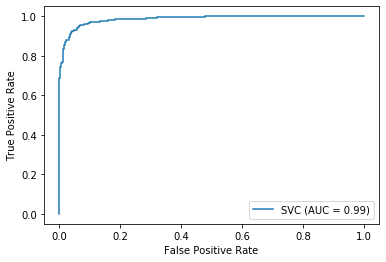

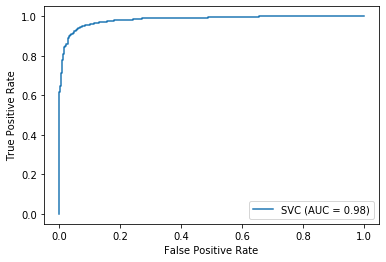

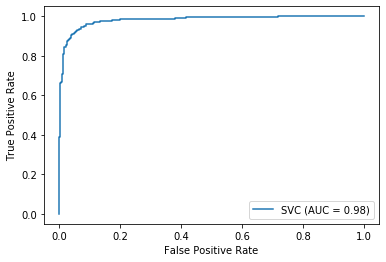

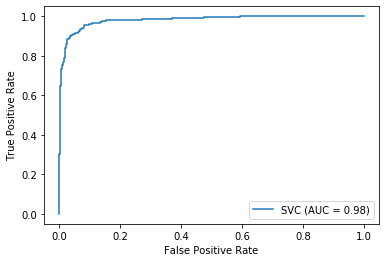

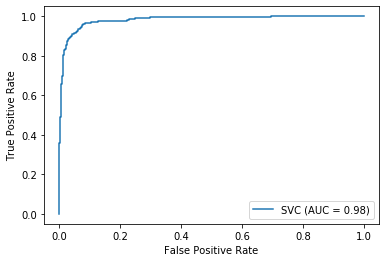

In [6]:
text_features = vectorizer.fit_transform(df['text'])
labels = df['label']
kf = KFold(n_splits=splits) # splits data into n (splits) random groups to test and train against  

precision_real, recall_real  = 0, 0 
precision_fake, recall_fake = 0, 0 
for train, test in kf.split(text_features):
    model = SVC()
    model.fit(text_features[train], labels.iloc[train]) # trains the data 
    predicts =  model.predict(text_features[test])  # tests and predicts 
    
    text_model_vis = plot_roc_curve(model, text_features[test], labels.iloc[test])  # False Positive vs. True Positive Visual

    
    report = classification_report(labels[test], predicts, output_dict=True)  # stores classification report to extract precision and recalls
    precision_real += report.get('REAL').get('precision')  # adds all of the precisions and recalls together into accumulator 
    recall_real += report.get('REAL').get('recall')
    precision_fake += report.get('FAKE').get('precision')
    recall_fake += report.get('FAKE').get('recall')
    
# finds averages of precisions and recalls 
precision_real /= splits
precision_fake /= splits
recall_real /= splits
recall_fake /= splits


#     print('predictions:', predicts)
#     print('test:', labels[test])
#     print (classification_report(labels[test], predicts))

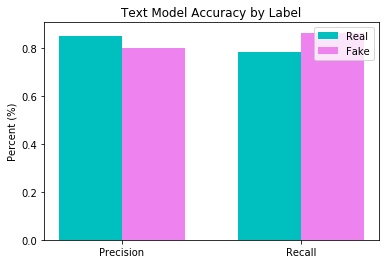

In [48]:
# Creates bar graph comparing Percent Accuracy of testing based on if real or fake
N = 2
real = (precision_real, recall_real)
fake = (precision_fake, recall_fake)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, real, width, label='Real', color = ('c'))
plt.bar(ind + width, fake, width, label='Fake', color=('violet'))

plt.ylabel('Percent (%)')
plt.title('Text Model Accuracy by Label')

plt.xticks(ind + width / 2, ('Precision', 'Recall'))
plt.legend(loc='best')

plt.show()

# Proof of Title Model Concept

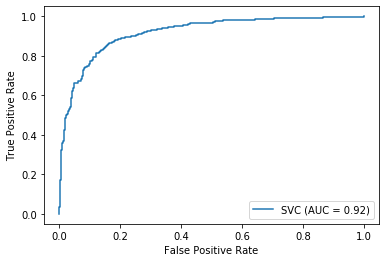

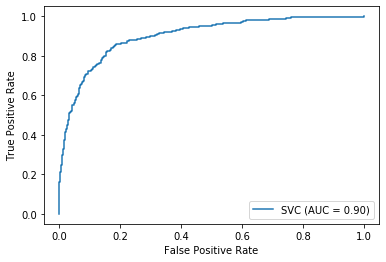

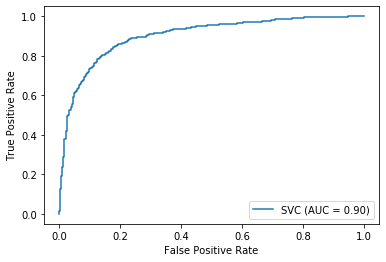

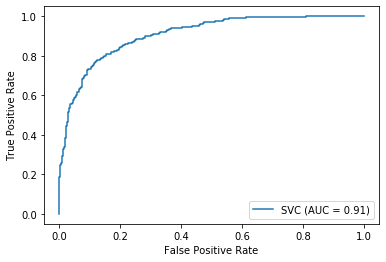

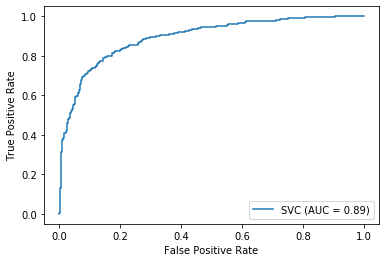

In [8]:
title_features = vectorizer.fit_transform(df['title'])
labels = df['label']
kf = KFold(n_splits=splits) # splits data into n (splits) random groups to test and train against

precision_real, recall_real  = 0, 0 
precision_fake, recall_fake = 0, 0 
for train, test in kf.split(title_features):
    model = SVC()
    model.fit(title_features[train], labels.iloc[train]) # trains data 
    predicts =  model.predict(title_features[test])  # tests and predicts 
    
    title_model_vis = plot_roc_curve(model, title_features[test], labels.iloc[test])  # False Positive vs. True Positive

    
    report = classification_report(labels[test], predicts, output_dict=True)# stores classification report to extract precision and recalls
    precision_real += report.get('REAL').get('precision')  # adds all of the precisions and recalls together into accumulator 
    recall_real += report.get('REAL').get('recall')
    precision_fake += report.get('FAKE').get('precision')
    recall_fake += report.get('FAKE').get('recall')
    
# gets averages of precisions and recalls  
precision_real /= splits
precision_fake /= splits
recall_real /= splits
recall_fake /= splits


#     print('predictions:', predicts)
#     print('test:', labels[test])
#     print (classification_report(labels[test], predicts))

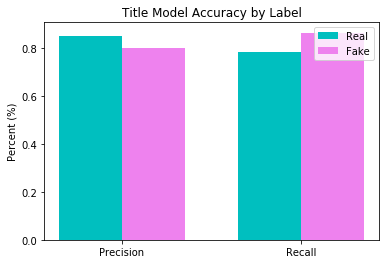

In [51]:
# Creates bar graph comparing Percent Accuracy of testing based on if real or fake

N = 2
real = (precision_real, recall_real)
fake = (precision_fake, recall_fake)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, real, width, label='Real', color=('c'))
plt.bar(ind + width, fake, width, label='Fake', color=('violet'))

plt.ylabel('Percent (%)')
plt.title('Title Model Accuracy by Label')

plt.xticks(ind + width / 2, ('Precision', 'Recall'))
plt.legend(loc='best')

plt.show()

**After testing and training 6335 articles, we can trust that a model based on this dataset will have a precision between 91 and 97% and are satisfied with that score.**

# Creating Models

In [10]:
def train_text__model():
    model = SVC()
    model.fit(text_features, labels)
    return model

text_model = train_text__model()

In [11]:
def train_title__model():
    model = SVC()
    model.fit(title_features, labels)
    return model

text_model = train_title__model()

# Web Scraping and Formatting

In [12]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request


def delete_tag(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']: # returns false if text is a tag
        return False
    if isinstance(element, Comment): # returns false if text is a comment
        return False
    return True

def html_to_text(body):
    soup = BeautifulSoup(body, 'html.parser')  # goes through article and converts page into text type
    texts = soup.findAll(text=True)
    visible_texts = filter(delete_tag, texts)  
    return u" ".join(t.strip() for t in visible_texts)

# Test Article by Text

In [24]:
try:
    html = urllib.request.urlopen(input("Copy and Paste article url: ")).read()
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.find('title')
    text = html_to_text(html)
except: # if website blocks  from scraping, ask user for title of website
    print('Unable to access url of article.')
    title = input("Copy and paste Title Name: ")
    text = input("Copy and paste Article Text: ")
    
    
data = [[text.lstrip()]]
df2 = pd.DataFrame(data, columns = ['text'])


article_text = vectorizer.transform(df2['text'])
result = text_model.predict(article_text)

Copy and Paste article url: https://www.cosmopolitan.com/sex-love/a33575284/quarantine-dating-app-questions/


In [25]:
if result == ['FAKE']:
    print ('This article is fake. Find a better source.')
elif result == ['REAL']:
    print ('This article is real. You can trust this source.')
else:
    print ('There is an error.')

This article is fake. Find a better source.


# Test Article by Title

In [22]:
try:
    html = urllib.request.urlopen(input("Copy and Paste article url: ")).read()
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.find('title').get_text()
    text = html_to_text(html)
except: # if website blocks  from scraping, ask user for title of website
    print('Unable to access url of article.')
    title = input("Copy and Paste Title Name: ")
    text = input("Copy and Paste Article Text: ")
    
    
data = [[title]]
df2 = pd.DataFrame(data, columns = ['title'])


article_title = vectorizer.transform(df2['title'])
result2 = text_model.predict(article_title)

Copy and Paste article url: https://www.cnn.com/2020/08/12/politics/kamala-harris-pronunciation/index.html


In [23]:
if result2 == ['FAKE']:
    print ('This article is fake. Find a better source.')
elif result2 == ['REAL']:
    print ('This article is real. You can trust this source.')
else:
    print ('There is an error.')

This article is real. You can trust this source.
